In [ ]:
import google.colab
google.colab.drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def seed_everything(seed_value):
  np.random.seed(seed_value)
  torch.manual_seed(seed_value)
  if torch.cuda.is_available():
    torch.cuda.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True
seed_everything(86)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
def preprocess_data(input_file, output_file):
    df = pd.read_excel(input_file)
    df = df[df['Bình Luận'].notna() & (df['Bình Luận'] != '')]

    label_encoder = LabelEncoder()
    df['Cảm Xúc'] = df['Cảm Xúc'].map({'tích cực': 2, 'tiêu cực': 0, 'trung tính': 1})
    df['Cảm Xúc'] = label_encoder.fit_transform(df['Cảm Xúc'])

    binary_cols = ['Sản Phẩm', 'Giá Cả', 'Vận Chuyển', 'Thái Độ Và Dịch Vụ Khách Hàng', 'Khác']
    for col in binary_cols:
        df[col] = df[col].map({'có': 1, 'không': 0})

    df.to_excel(output_file, index=False)
    return df, label_encoder, binary_cols

In [ ]:
input_file = "/content/drive/MyDrive/colab/PJ1/data_final_4.xlsx"
output_file = "/content/drive/MyDrive/colab/PJ1/processed_data.xlsx"

df, label_encoder, binary_cols = preprocess_data(input_file, output_file)
train_val_df, test_df = train_test_split(df, test_size=0.1, random_state=42, stratify=df['Cảm Xúc'])
train_df, val_df = train_test_split(train_val_df, test_size=0.1111, random_state=42, stratify=train_val_df['Cảm Xúc'])

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [ ]:
input_file2 = "/content/drive/MyDrive/colab/PJ1/data_final_3.xlsx"
output_file2 = "/content/drive/MyDrive/colab/PJ1/processed_data.xlsx"
df2, label_encoder2, binary_cols2 = preprocess_data(input_file2, output_file2)

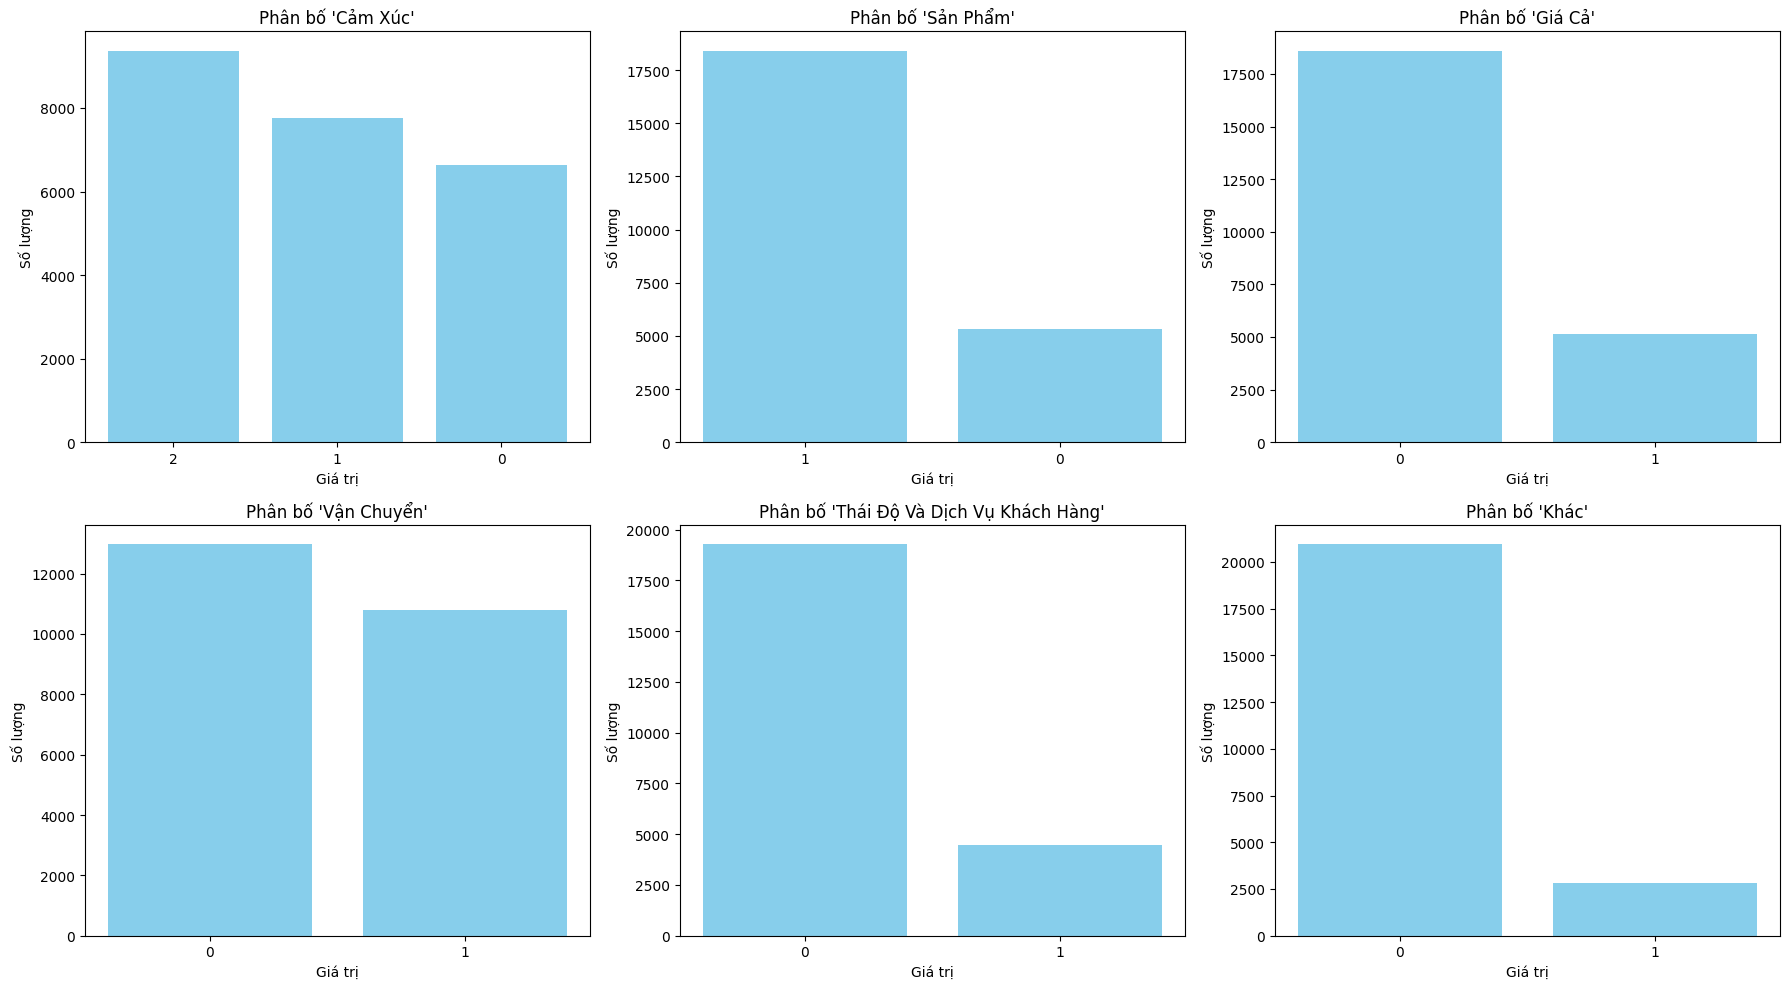

In [ ]:
cols = ['Cảm Xúc', 'Sản Phẩm', 'Giá Cả', 'Vận Chuyển', 'Thái Độ Và Dịch Vụ Khách Hàng', 'Khác']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # Tạo grid 2x3
axes = axes.flatten()

for i, col in enumerate(cols):
    value_counts = df[col].value_counts(dropna=False)
    axes[i].bar(value_counts.index.astype(str), value_counts.values, color='skyblue')
    axes[i].set_title(f"Phân bố '{col}'")
    axes[i].set_ylabel('Số lượng')
    axes[i].set_xlabel('Giá trị')

plt.tight_layout()
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23749 entries, 0 to 23748
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Bình Luận                      23749 non-null  object
 1   Cảm Xúc                        23749 non-null  int64 
 2   Sản Phẩm                       23749 non-null  int64 
 3   Giá Cả                         23749 non-null  int64 
 4   Vận Chuyển                     23749 non-null  int64 
 5   Thái Độ Và Dịch Vụ Khách Hàng  23749 non-null  int64 
 6   Khác                           23749 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [ ]:
df.tail()

,Bình Luận,Cảm Xúc,Sản Phẩm,Giá Cả,Vận Chuyển,Thái Độ Và Dịch Vụ Khách Hàng,Khác
23744,chất lượng giao không đúng sản phẩm kết cấu hi...,0,1,0,1,0,0
23745,trả lời trả lời trả lời trả lời trả lời trả lờ...,1,0,0,0,1,0
23746,"độ bền thời gian đèn led chỉ báo dễ sử dụng, t...",2,1,1,0,0,0
23747,"chưa sài chưa biết ra sau miro thấy ok lắm, đú...",1,1,0,0,0,0
23748,nhiều màu sắc để phù hợp với phong cách của bạ...,1,1,0,0,0,0


In [ ]:
duplicate_col_names = df.columns[df.columns.duplicated()].tolist()
print("cột trùng", duplicate_col_names)

cột trùng []


Text(0.5, 9.444444444444438, 'Token Count')

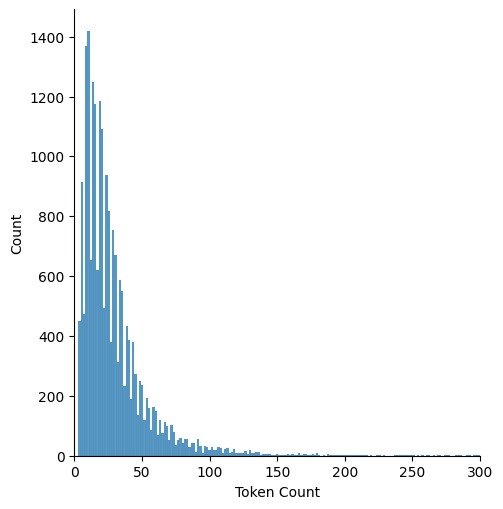

In [ ]:
all_data = train_df['Bình Luận'].tolist() + test_df['Bình Luận'].tolist()
encoded_text = [tokenizer.encode(text, add_special_tokens=True) for text in all_data]
token_lens = [len(text) for text in encoded_text]
sns.displot(token_lens)
plt.xlim([0,300])
plt.xlabel('Token Count')

Mounted at /content/drive
Using device: cuda


Epoch 1/20 - Huấn luyện: 100%|██████████| 126/126 [04:52<00:00,  2.32s/it]


Epoch 1 - Train Loss: 1.9785, Val Loss: 1.9512, Train Acc: 0.4422, Val Acc: 0.3971
Lưu mô hình tốt nhất tại epoch 1 với Val Loss: 1.9512


Epoch 2/20 - Huấn luyện: 100%|██████████| 126/126 [04:50<00:00,  2.30s/it]


Epoch 2 - Train Loss: 1.7170, Val Loss: 1.4918, Train Acc: 0.7943, Val Acc: 0.7903
Lưu mô hình tốt nhất tại epoch 2 với Val Loss: 1.4918


Epoch 3/20 - Huấn luyện: 100%|██████████| 126/126 [04:50<00:00,  2.30s/it]


Epoch 3 - Train Loss: 1.3932, Val Loss: 1.2703, Train Acc: 0.8393, Val Acc: 0.8286
Lưu mô hình tốt nhất tại epoch 3 với Val Loss: 1.2703


Epoch 4/20 - Huấn luyện: 100%|██████████| 126/126 [04:50<00:00,  2.30s/it]


Epoch 4 - Train Loss: 1.2430, Val Loss: 1.1739, Train Acc: 0.8481, Val Acc: 0.8349
Lưu mô hình tốt nhất tại epoch 4 với Val Loss: 1.1739


Epoch 5/20 - Huấn luyện: 100%|██████████| 126/126 [04:50<00:00,  2.30s/it]


Epoch 5 - Train Loss: 1.1410, Val Loss: 1.0843, Train Acc: 0.8664, Val Acc: 0.8442
Lưu mô hình tốt nhất tại epoch 5 với Val Loss: 1.0843


Epoch 6/20 - Huấn luyện: 100%|██████████| 126/126 [04:50<00:00,  2.30s/it]


Epoch 6 - Train Loss: 1.0850, Val Loss: 1.0511, Train Acc: 0.8759, Val Acc: 0.8514
Lưu mô hình tốt nhất tại epoch 6 với Val Loss: 1.0511


Epoch 7/20 - Huấn luyện: 100%|██████████| 126/126 [04:50<00:00,  2.30s/it]


Epoch 7 - Train Loss: 1.0360, Val Loss: 1.0264, Train Acc: 0.8827, Val Acc: 0.8522
Lưu mô hình tốt nhất tại epoch 7 với Val Loss: 1.0264


Epoch 8/20 - Huấn luyện: 100%|██████████| 126/126 [04:49<00:00,  2.30s/it]


Epoch 8 - Train Loss: 1.0084, Val Loss: 0.9997, Train Acc: 0.8869, Val Acc: 0.8577
Lưu mô hình tốt nhất tại epoch 8 với Val Loss: 0.9997


Epoch 9/20 - Huấn luyện: 100%|██████████| 126/126 [04:50<00:00,  2.30s/it]


Epoch 9 - Train Loss: 0.9754, Val Loss: 0.9961, Train Acc: 0.8890, Val Acc: 0.8560
Lưu mô hình tốt nhất tại epoch 9 với Val Loss: 0.9961


Epoch 10/20 - Huấn luyện: 100%|██████████| 126/126 [04:50<00:00,  2.31s/it]


Epoch 10 - Train Loss: 0.9516, Val Loss: 0.9781, Train Acc: 0.8956, Val Acc: 0.8606
Lưu mô hình tốt nhất tại epoch 10 với Val Loss: 0.9781


Epoch 11/20 - Huấn luyện: 100%|██████████| 126/126 [04:50<00:00,  2.31s/it]


Epoch 11 - Train Loss: 0.9300, Val Loss: 0.9653, Train Acc: 0.9022, Val Acc: 0.8627
Lưu mô hình tốt nhất tại epoch 11 với Val Loss: 0.9653


Epoch 12/20 - Huấn luyện: 100%|██████████| 126/126 [04:49<00:00,  2.30s/it]


Epoch 12 - Train Loss: 0.9145, Val Loss: 0.9602, Train Acc: 0.9041, Val Acc: 0.8602
Lưu mô hình tốt nhất tại epoch 12 với Val Loss: 0.9602


Epoch 13/20 - Huấn luyện: 100%|██████████| 126/126 [04:50<00:00,  2.31s/it]


Epoch 13 - Train Loss: 0.9032, Val Loss: 0.9483, Train Acc: 0.9077, Val Acc: 0.8619
Lưu mô hình tốt nhất tại epoch 13 với Val Loss: 0.9483


Epoch 14/20 - Huấn luyện: 100%|██████████| 126/126 [04:50<00:00,  2.31s/it]


Epoch 14 - Train Loss: 0.8905, Val Loss: 0.9443, Train Acc: 0.9080, Val Acc: 0.8615
Lưu mô hình tốt nhất tại epoch 14 với Val Loss: 0.9443


Epoch 15/20 - Huấn luyện: 100%|██████████| 126/126 [04:50<00:00,  2.30s/it]


Epoch 15 - Train Loss: 0.8739, Val Loss: 0.9410, Train Acc: 0.9110, Val Acc: 0.8644
Lưu mô hình tốt nhất tại epoch 15 với Val Loss: 0.9410


Epoch 16/20 - Huấn luyện: 100%|██████████| 126/126 [04:50<00:00,  2.31s/it]


Epoch 16 - Train Loss: 0.8691, Val Loss: 0.9354, Train Acc: 0.9154, Val Acc: 0.8653
Lưu mô hình tốt nhất tại epoch 16 với Val Loss: 0.9354


Epoch 17/20 - Huấn luyện: 100%|██████████| 126/126 [04:50<00:00,  2.31s/it]


Epoch 17 - Train Loss: 0.8561, Val Loss: 0.9353, Train Acc: 0.9165, Val Acc: 0.8665
Lưu mô hình tốt nhất tại epoch 17 với Val Loss: 0.9353


Epoch 18/20 - Huấn luyện: 100%|██████████| 126/126 [04:50<00:00,  2.30s/it]


Epoch 18 - Train Loss: 0.8532, Val Loss: 0.9386, Train Acc: 0.9156, Val Acc: 0.8657


Epoch 19/20 - Huấn luyện: 100%|██████████| 126/126 [04:49<00:00,  2.30s/it]


Epoch 19 - Train Loss: 0.8509, Val Loss: 0.9317, Train Acc: 0.9186, Val Acc: 0.8699
Lưu mô hình tốt nhất tại epoch 19 với Val Loss: 0.9317


Epoch 20/20 - Huấn luyện: 100%|██████████| 126/126 [04:50<00:00,  2.30s/it]


Epoch 20 - Train Loss: 0.8438, Val Loss: 0.9324, Train Acc: 0.9191, Val Acc: 0.8674
Best threshold for sản phẩm: 0.38 (F1=0.9015)
Best threshold for giá cả: 0.58 (F1=0.9300)
Best threshold for vận chuyển: 0.58 (F1=0.9285)
Best threshold for thái độ và dịch vụ khách hàng: 0.72 (F1=0.7765)
Best threshold for khác: 0.58 (F1=0.7216)

Kết quả trên tập test với threshold tối ưu:
Cảm xúc - Độ chính xác: 0.8636, Precision: 0.8591, Recall: 0.8613, F1: 0.8593
sản phẩm - Độ chính xác: 0.8518, Precision: 0.8569, Recall: 0.9719, F1: 0.9108
giá cả - Độ chính xác: 0.9596, Precision: 0.8815, Recall: 0.9476, F1: 0.9134
vận chuyển - Độ chính xác: 0.9364, Precision: 0.9194, Recall: 0.9363, F1: 0.9278
thái độ và dịch vụ khách hàng - Độ chính xác: 0.9124, Precision: 0.7469, Recall: 0.8041, F1: 0.7744
khác - Độ chính xác: 0.9242, Precision: 0.6852, Recall: 0.7133, F1: 0.6990


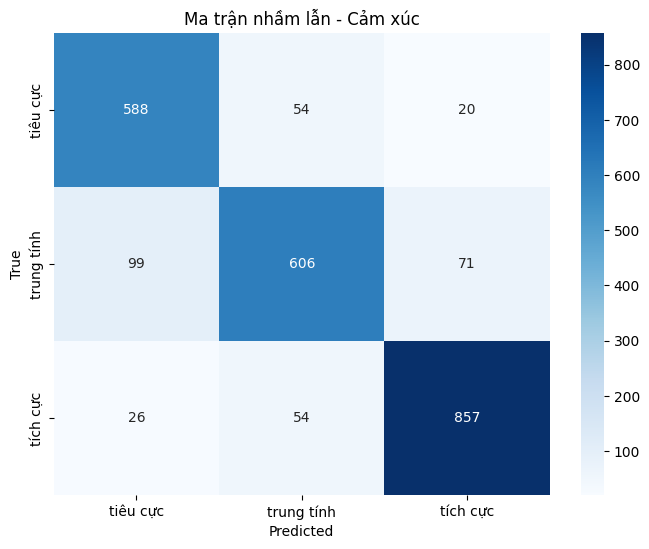

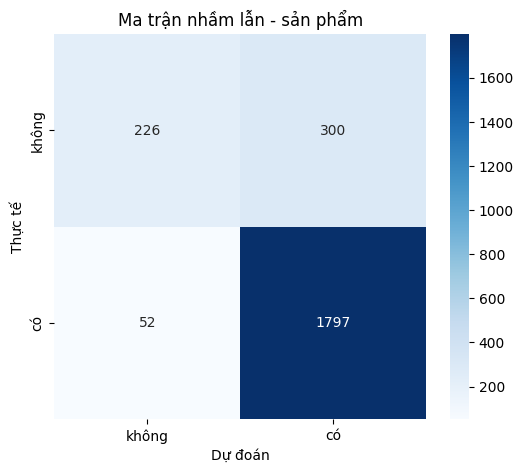

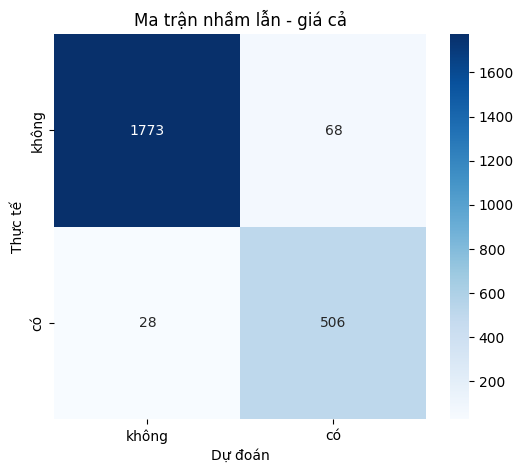

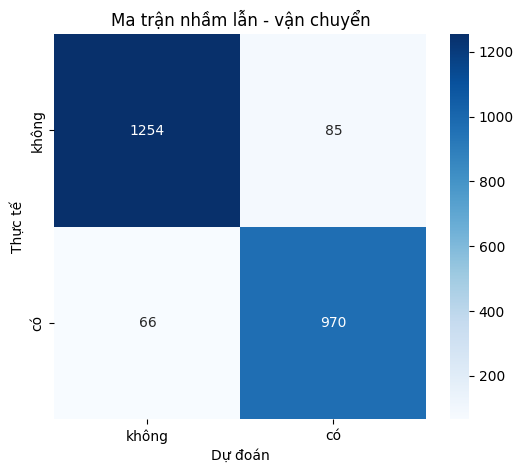

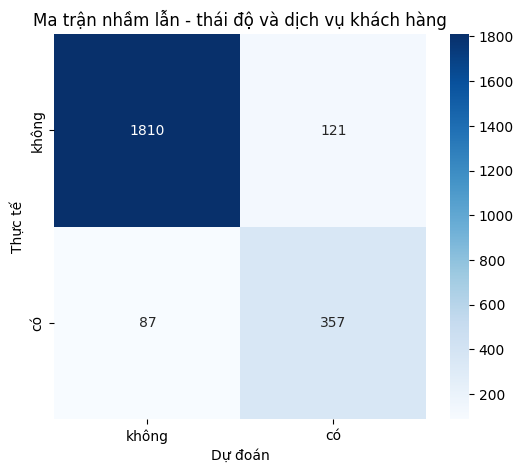

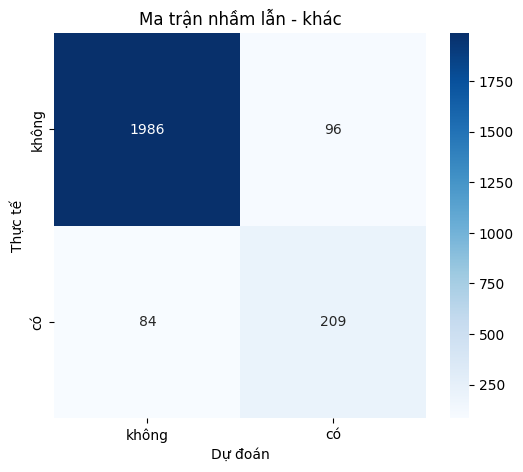

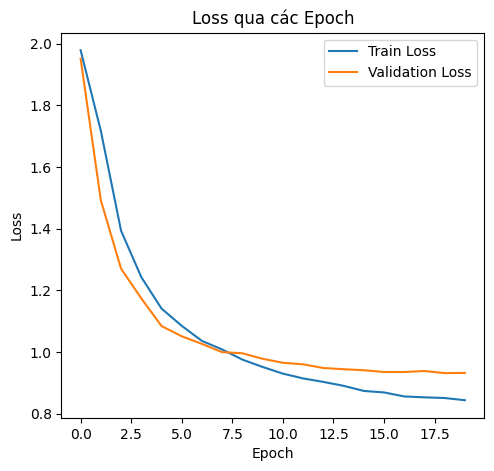

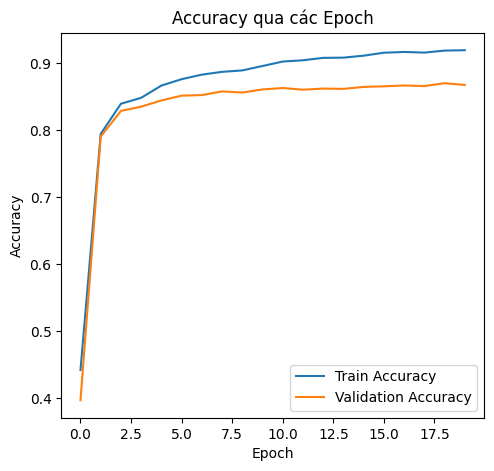

Văn bản: giao hàng mùa dịch hơi bị lâu
Cảm xúc - Thực tế: tiêu cực, Dự đoán: tiêu cực
sản phẩm - Thực tế: không, Dự đoán: có
giá cả - Thực tế: không, Dự đoán: không
vận chuyển - Thực tế: có, Dự đoán: có
thái độ và dịch vụ khách hàng - Thực tế: không, Dự đoán: không
khác - Thực tế: không, Dự đoán: không

Văn bản: sách nội dung hay lắm, chất lượng sách tốt tuy nhiên nội dung chưa hay.
Cảm xúc - Thực tế: trung tính, Dự đoán: trung tính
sản phẩm - Thực tế: có, Dự đoán: có
giá cả - Thực tế: không, Dự đoán: không
vận chuyển - Thực tế: không, Dự đoán: không
thái độ và dịch vụ khách hàng - Thực tế: không, Dự đoán: không
khác - Thực tế: không, Dự đoán: không

Văn bản: gửi hàng nhanh gói hàng cẩn thận giá mềm vừa túi tiền ok shop. test thử khi nhận hàng về thấy hát nhẹ tiếng trong hút tốt không hú rít quá êm. mọi người nên ghé ủm hộ shop
Cảm xúc - Thực tế: tích cực, Dự đoán: tích cực
sản phẩm - Thực tế: có, Dự đoán: có
giá cả - Thực tế: có, Dự đoán: có
vận chuyển - Thực tế: có, Dự đoán: có
thái 

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, Sampler
from transformers import AutoModel, AutoTokenizer, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from google.colab import drive
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts

drive.mount('/content/drive', force_remount=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

MODEL_SAVE_PATH = "/content/drive/MyDrive/colab/PJ1/best_model_optimized.pth"

class StratifiedBatchSampler(Sampler):
    def __init__(self, labels, batch_size, shuffle=True):
        self.labels = np.array(labels)
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.classes, self.counts = np.unique(self.labels, return_counts=True)
        self.class_indices = [np.where(self.labels == c)[0] for c in self.classes]
        self.n_samples_per_class = self.batch_size // len(self.classes)
        self.total_batches = min([c // self.n_samples_per_class for c in self.counts])

    def __iter__(self):
        class_indices = [indices.copy() for indices in self.class_indices]
        if self.shuffle:
            for indices in class_indices:
                np.random.shuffle(indices)

        batches = []
        for _ in range(self.total_batches):
            batch = []
            for i, indices in enumerate(class_indices):
                if len(indices) >= self.n_samples_per_class:
                    selected_indices = indices[:self.n_samples_per_class]
                    batch.extend(selected_indices)
                    class_indices[i] = indices[self.n_samples_per_class:]
            if len(batch) == self.batch_size and self.shuffle:
                np.random.shuffle(batch)
            batches.append(batch)
        return iter(batches)

    def __len__(self):
        return self.total_batches

def preprocess_data(input_file, output_file):
    df = pd.read_excel(input_file)
    df = df[df['Bình Luận'].notna() & (df['Bình Luận'] != '')]
    df = df.rename(columns={
        'Cảm Xúc': 'emotion',
        'Sản Phẩm': 'sản phẩm',
        'Giá Cả': 'giá cả',
        'Vận Chuyển': 'vận chuyển',
        'Thái Độ Và Dịch Vụ Khách Hàng': 'thái độ và dịch vụ khách hàng',
        'Khác': 'khác'
    })

    label_encoder = LabelEncoder()
    df['emotion'] = df['emotion'].map({'tích cực': 2, 'tiêu cực': 0, 'trung tính': 1})
    df['emotion'] = label_encoder.fit_transform(df['emotion'])

    binary_cols = ['sản phẩm', 'giá cả', 'vận chuyển', 'thái độ và dịch vụ khách hàng', 'khác']
    for col in binary_cols:
        df[col] = df[col].map({'có': 1, 'không': 0})

    df.to_excel(output_file, index=False)
    return df, label_encoder, binary_cols

# Tính trọng số lớp
def compute_class_weights(train_df, binary_cols):
    emotion_counts = train_df['emotion'].value_counts().sort_index().tolist()
    total_samples = sum(emotion_counts)
    emotion_weights = torch.tensor(
        [total_samples / (len(emotion_counts) * c) for c in emotion_counts]
    ).float().to(device)

    pos_weights = {}
    for col in binary_cols:
        counts = train_df[col].value_counts()
        neg, pos = counts.get(0, 0), counts.get(1, 0)
        pos_weights[col] = torch.tensor((neg + 1) / (pos + 1)).float().to(device) if pos > 0 else torch.tensor(1.0).float().to(device)

    return emotion_weights, pos_weights

# Dataset
class ReviewDataset(Dataset):
    def __init__(self, texts, emotion_labels, binary_labels, tokenizer, max_length=128):
        self.texts = texts
        self.emotion_labels = emotion_labels
        self.binary_labels = binary_labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].squeeze(0)
        attention_mask = encoding['attention_mask'].squeeze(0)
        binary_dict = {col: torch.tensor(self.binary_labels[col][idx], dtype=torch.float) for col in self.binary_labels}
        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'emotion_labels': torch.tensor(self.emotion_labels[idx], dtype=torch.long),
            'binary_labels': binary_dict
        }

def collate_fn(batch):
    input_ids = torch.stack([item['input_ids'] for item in batch])
    attention_mask = torch.stack([item['attention_mask'] for item in batch])
    emotion_labels = torch.stack([item['emotion_labels'] for item in batch])
    binary_labels = {col: torch.stack([item['binary_labels'][col] for item in batch]) for col in batch[0]['binary_labels']}
    return {
        'input_ids': input_ids,
        'attention_mask': attention_mask,
        'emotion_labels': emotion_labels,
        'binary_labels': binary_labels
    }

class BertBiLSTMClassifier(nn.Module):
    def __init__(self, bert_model_name, num_emotion_classes, binary_cols, lstm_hidden_size=128, dropout=0.3):
        super(BertBiLSTMClassifier, self).__init__()
        self.bert = AutoModel.from_pretrained(bert_model_name)
        # Freeze 4 layer đầu của BERT
        for param in self.bert.encoder.layer[:4].parameters():
            param.requires_grad = False
        self.lstm = nn.LSTM(
            input_size=self.bert.config.hidden_size,
            hidden_size=lstm_hidden_size,
            num_layers=1,
            batch_first=True,
            bidirectional=True
        )
        self.dropout = nn.Dropout(dropout)
        self.emotion_fc = nn.Linear(lstm_hidden_size * 2, num_emotion_classes)
        self.binary_fcs = nn.ModuleDict({col: nn.Linear(lstm_hidden_size * 2, 1) for col in binary_cols})

    def forward(self, input_ids, attention_mask):
        bert_outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        sequence_output = bert_outputs.last_hidden_state
        lstm_output, _ = self.lstm(sequence_output)
        lstm_output = lstm_output[:, -1, :]
        lstm_output = self.dropout(lstm_output)
        emotion_logits = self.emotion_fc(lstm_output)
        binary_logits = {col: self.binary_fcs[col](lstm_output).squeeze(-1) for col in self.binary_fcs}
        return emotion_logits, binary_logits

class MultiTaskLoss(nn.Module):
    def __init__(self, binary_cols, emotion_weights, pos_weights, lambda_binary=1.0):
        super(MultiTaskLoss, self).__init__()
        self.emotion_criterion = nn.CrossEntropyLoss(weight=emotion_weights, label_smoothing=0.1)
        self.binary_criteria = nn.ModuleDict({
            col: nn.BCEWithLogitsLoss(pos_weight=pos_weights[col]) for col in binary_cols
        })
        self.binary_cols = binary_cols
        self.lambda_binary = lambda_binary

    def forward(self, emotion_logits, binary_logits, emotion_labels, binary_labels):
        emotion_loss = self.emotion_criterion(emotion_logits, emotion_labels)
        binary_loss = sum(self.binary_criteria[col](binary_logits[col], binary_labels[col]) for col in self.binary_cols) / len(self.binary_cols)
        total_loss = emotion_loss + self.lambda_binary * binary_loss
        return total_loss

def evaluate_model(model, data_loader, loss_fn, binary_cols, threshold_dict):
    model.eval()
    emotion_preds, emotion_labels = [], []
    binary_preds, binary_labels = {col: [] for col in binary_cols}, {col: [] for col in binary_cols}
    total_loss = 0.0

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            emotion_true = batch['emotion_labels'].to(device)
            binary_true = {col: batch['binary_labels'][col].to(device) for col in binary_cols}

            emotion_logits, binary_logits = model(input_ids, attention_mask)
            loss = loss_fn(emotion_logits, binary_logits, emotion_true, binary_true)
            total_loss += loss.item()

            emotion_preds.extend(torch.argmax(emotion_logits, dim=1).cpu().numpy())
            emotion_labels.extend(emotion_true.cpu().numpy())
            for col in binary_cols:
                binary_preds[col].extend((torch.sigmoid(binary_logits[col]) > threshold_dict[col]).float().cpu().numpy())
                binary_labels[col].extend(binary_true[col].cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    emotion_accuracy = accuracy_score(emotion_labels, emotion_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(emotion_labels, emotion_preds, average='macro')
    emotion_metrics = {'accuracy': emotion_accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'loss': avg_loss}

    binary_metrics = {}
    for col in binary_cols:
        accuracy = accuracy_score(binary_labels[col], binary_preds[col])
        precision, recall, f1, _ = precision_recall_fscore_support(binary_labels[col], binary_preds[col], average='binary')
        binary_metrics[col] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

    return {
        'emotion_metrics': emotion_metrics,
        'binary_metrics': binary_metrics,
        'emotion_true': emotion_labels,
        'emotion_pred': emotion_preds,
        'binary_true': binary_labels,
        'binary_pred': binary_preds,
        'avg_loss': avg_loss
    }

def plot_confusion_matrix_emotion(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(f'{title.lower().replace(" ", "_")}.png')
    plt.show()
    plt.close()

def plot_confusion_matrix_binary(y_true, y_pred, col_name):
    cm = confusion_matrix(y_true, y_pred)
    labels = ['không', 'có']
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'Ma trận nhầm lẫn - {col_name}')
    plt.xlabel('Dự đoán')
    plt.ylabel('Thực tế')
    plt.savefig(f'ma_tran_nham_lan_{col_name.lower().replace(" ", "_")}.png')
    plt.show()
    plt.close()

def predict_and_show_examples(model, data_loader, binary_cols, threshold_dict, num_examples=10):
    model.eval()
    examples = []
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            emotion_true = batch['emotion_labels'].cpu().numpy()
            binary_true = {col: batch['binary_labels'][col].cpu().numpy() for col in binary_cols}

            emotion_logits, binary_logits = model(input_ids, attention_mask)
            emotion_pred = torch.argmax(emotion_logits, dim=1).cpu().numpy()
            binary_pred = {col: (torch.sigmoid(binary_logits[col]) > threshold_dict[col]).float().cpu().numpy() for col in binary_cols}

            for i in range(input_ids.size(0)):
                if len(examples) < num_examples:
                    emotion_true_label = ['tiêu cực', 'trung tính', 'tích cực'][emotion_true[i]]
                    emotion_pred_label = ['tiêu cực', 'trung tính', 'tích cực'][emotion_pred[i]]
                    binary_true_labels = {col: 'có' if binary_true[col][i] == 1 else 'không' for col in binary_cols}
                    binary_pred_labels = {col: 'có' if binary_pred[col][i] == 1 else 'không' for col in binary_cols}
                    examples.append({
                        'text': data_loader.dataset.texts[i],
                        'emotion_true': emotion_true_label,
                        'emotion_pred': emotion_pred_label,
                        'binary_true': binary_true_labels,
                        'binary_pred': binary_pred_labels
                    })
                else:
                    break
            if len(examples) >= num_examples:
                break

    for ex in examples:
        print(f"Văn bản: {ex['text']}")
        print(f"Cảm xúc - Thực tế: {ex['emotion_true']}, Dự đoán: {ex['emotion_pred']}")
        for col in binary_cols:
            print(f"{col} - Thực tế: {ex['binary_true'][col]}, Dự đoán: {ex['binary_pred'][col]}")
        print()

def plot_training_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss qua các Epoch')
    plt.savefig('loss_qua_cac_epoch.png')
    plt.show()
    plt.close()

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy qua các Epoch')
    plt.savefig('accuracy_qua_cac_epoch.png')
    plt.show()
    plt.close()

def find_best_thresholds(model, val_loader, binary_cols):
    model.eval()
    all_logits, all_labels = {col: [] for col in binary_cols}, {col: [] for col in binary_cols}
    with torch.no_grad():
        for batch in val_loader:
            _, binary_logits = model(
                batch['input_ids'].to(device),
                batch['attention_mask'].to(device)
            )
            for col in binary_cols:
                all_logits[col].extend(torch.sigmoid(binary_logits[col]).cpu().numpy())
                all_labels[col].extend(batch['binary_labels'][col].cpu().numpy())

    best_thresholds = {}
    for col in binary_cols:
        best_f1, best_t = 0, 0.5
        for t in np.linspace(0.1, 0.9, 41):
            preds = (np.array(all_logits[col]) > t).astype(int)
            f1 = f1_score(all_labels[col], preds)
            if f1 > best_f1:
                best_f1, best_t = f1, t
        best_thresholds[col] = best_t
        print(f"Best threshold for {col}: {best_t:.2f} (F1={best_f1:.4f})")
    return best_thresholds

def train_model(model, train_loader, val_loader, loss_fn, optimizer, scheduler, num_epochs, binary_cols, threshold_dict, patience=5):
    best_val_loss = float('inf')
    patience_counter = 0
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for batch in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs} - Huấn luyện"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            emotion_labels = batch['emotion_labels'].to(device)
            binary_labels = {col: batch['binary_labels'][col].to(device) for col in binary_cols}

            optimizer.zero_grad()
            emotion_logits, binary_logits = model(input_ids, attention_mask)
            loss = loss_fn(emotion_logits, binary_logits, emotion_labels, binary_labels)
            loss.backward()
            # Gradient clipping với max_norm=1.5
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.5)
            optimizer.step()
            scheduler.step()
            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        train_metrics = evaluate_model(model, train_loader, loss_fn, binary_cols, threshold_dict)
        train_accuracies.append(train_metrics['emotion_metrics']['accuracy'])

        val_metrics = evaluate_model(model, val_loader, loss_fn, binary_cols, threshold_dict)
        val_loss = val_metrics['avg_loss']
        val_losses.append(val_loss)
        val_accuracies.append(val_metrics['emotion_metrics']['accuracy'])

        print(f"Epoch {epoch + 1} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_accuracies[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), MODEL_SAVE_PATH)
            print(f"Lưu mô hình tốt nhất tại epoch {epoch + 1} với Val Loss: {best_val_loss:.4f}")
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Dừng sớm tại epoch {epoch + 1}")
                break

    return val_metrics, train_losses, val_losses, train_accuracies, val_accuracies

def main():
    input_file = "/content/drive/MyDrive/colab/PJ1/data_final_4.xlsx"
    output_file = "/content/drive/MyDrive/colab/PJ1/processed_data.xlsx"

    df, label_encoder, binary_cols = preprocess_data(input_file, output_file)
    train_val_df, test_df = train_test_split(df, test_size=0.1, random_state=42, stratify=df['emotion'])
    train_df, val_df = train_test_split(train_val_df, test_size=0.1111, random_state=42, stratify=train_val_df['emotion'])

    train_df = train_df.reset_index(drop=True)
    val_df = val_df.reset_index(drop=True)
    test_df = test_df.reset_index(drop=True)

    emotion_weights, pos_weights = compute_class_weights(train_df, binary_cols)
    tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")

    train_dataset = ReviewDataset(
        texts=train_df['Bình Luận'].values,
        emotion_labels=train_df['emotion'].values,
        binary_labels={col: train_df[col].values for col in binary_cols},
        tokenizer=tokenizer
    )
    val_dataset = ReviewDataset(
        texts=val_df['Bình Luận'].values,
        emotion_labels=val_df['emotion'].values,
        binary_labels={col: val_df[col].values for col in binary_cols},
        tokenizer=tokenizer
    )
    test_dataset = ReviewDataset(
        texts=test_df['Bình Luận'].values,
        emotion_labels=test_df['emotion'].values,
        binary_labels={col: test_df[col].values for col in binary_cols},
        tokenizer=tokenizer
    )

    batch_size = 128
    train_sampler = StratifiedBatchSampler(train_df['emotion'].values, batch_size=batch_size, shuffle=True)
    train_loader = DataLoader(train_dataset, batch_sampler=train_sampler, collate_fn=collate_fn)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

    model = BertBiLSTMClassifier(
        bert_model_name="vinai/phobert-base",
        num_emotion_classes=3,
        binary_cols=binary_cols,
        lstm_hidden_size=128,
        dropout=0.4
    ).to(device)

    # Hàm mất mát
    loss_fn = MultiTaskLoss(
        binary_cols=binary_cols,
        emotion_weights=emotion_weights,
        pos_weights=pos_weights,
        lambda_binary=1.0
    )

    optimizer = optim.AdamW(model.parameters(), lr=1e-5, weight_decay=0.05)

    num_epochs = 20
    num_training_steps = len(train_loader) * num_epochs
    num_warmup_steps = int(0.1 * num_training_steps)
    scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=num_warmup_steps,
        num_training_steps=num_training_steps
    )


    threshold_dict = {col: 0.5 for col in binary_cols}
    val_metrics, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
        model, train_loader, val_loader, loss_fn, optimizer, scheduler, num_epochs=num_epochs,
        binary_cols=binary_cols, threshold_dict=threshold_dict, patience=3
    )

    threshold_dict = find_best_thresholds(model, val_loader, binary_cols)

    test_metrics = evaluate_model(model, test_loader, loss_fn, binary_cols, threshold_dict)
    print("\nKết quả trên tập test với threshold tối ưu:")
    print(f"Cảm xúc - Độ chính xác: {test_metrics['emotion_metrics']['accuracy']:.4f}, Precision: {test_metrics['emotion_metrics']['precision']:.4f}, "
          f"Recall: {test_metrics['emotion_metrics']['recall']:.4f}, F1: {test_metrics['emotion_metrics']['f1']:.4f}")
    for col in binary_cols:
        print(f"{col} - Độ chính xác: {test_metrics['binary_metrics'][col]['accuracy']:.4f}, Precision: {test_metrics['binary_metrics'][col]['precision']:.4f}, "
              f"Recall: {test_metrics['binary_metrics'][col]['recall']:.4f}, F1: {test_metrics['binary_metrics'][col]['f1']:.4f}")

    return model, test_loader, test_metrics, binary_cols, threshold_dict, train_losses, val_losses, train_accuracies, val_accuracies

if __name__ == "__main__":
    model, test_loader, test_metrics, binary_cols, threshold_dict, train_losses, val_losses, train_accuracies, val_accuracies = main()

    emotion_labels = ['tiêu cực', 'trung tính', 'tích cực']
    plot_confusion_matrix_emotion(test_metrics['emotion_true'], test_metrics['emotion_pred'], emotion_labels, 'Ma trận nhầm lẫn - Cảm xúc')

    for col in binary_cols:
        plot_confusion_matrix_binary(test_metrics['binary_true'][col], test_metrics['binary_pred'][col], col)

    plot_training_metrics(train_losses, val_losses, train_accuracies, val_accuracies)

    model.load_state_dict(torch.load(MODEL_SAVE_PATH))
    predict_and_show_examples(model, test_loader, binary_cols, threshold_dict, num_examples=10)